# Третья лабораторная работа

In [2]:
import thinkdsp as td
import numpy as np
PI2 = np.pi * 2

## Задание 1. 
Заменить окно Хэмминга из примера другим окном.

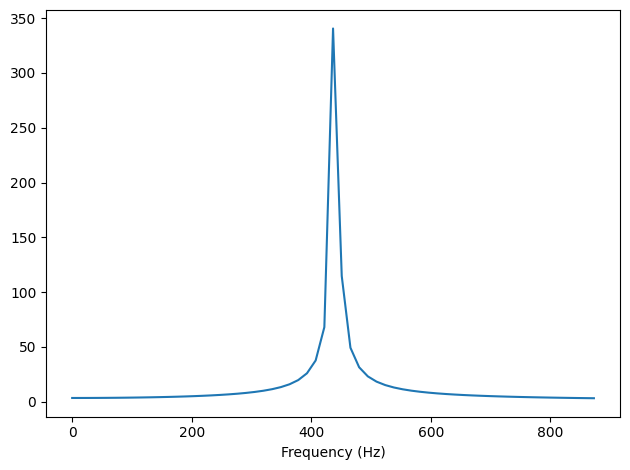

In [3]:
from thinkdsp import SinSignal, decorate
signal = SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

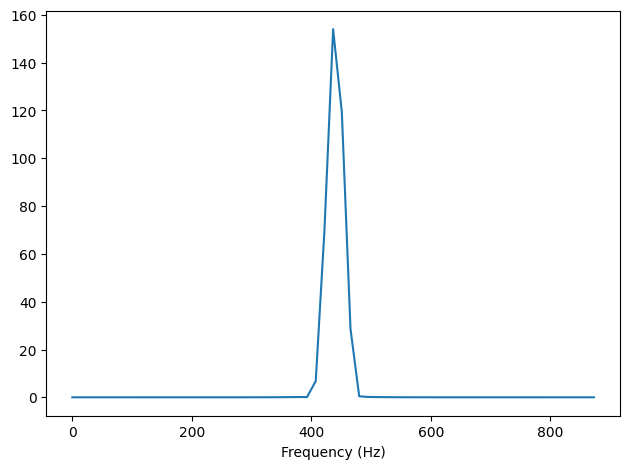

In [4]:
wave.ys *= np.blackman(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

По сравнению с окном Хэмминга, утечка устраняется более эффективно. В описании функции говорится об её оптимальности: "It was designed to have close to the minimal leakage possible. It is close to optimal, only slightly worse than a Kaiser window."

## Задание 2. 
Описать класс SawtoothChirp.

In [5]:
class SawtoothChirp(td.Chirp):
    def evaluate(self, ts):
        ts = np.asarray(ts)
        freqs = np.linspace(self.start, self.end, len(ts) - 1)
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  td.normalize(td.unbias(frac), self.amp)
        return ys

In [6]:
signal = SawtoothChirp(start=220, end=1760, amp=0.5)
wave1 = signal.make_wave(duration=5, framerate=5000)
wave1.make_audio()

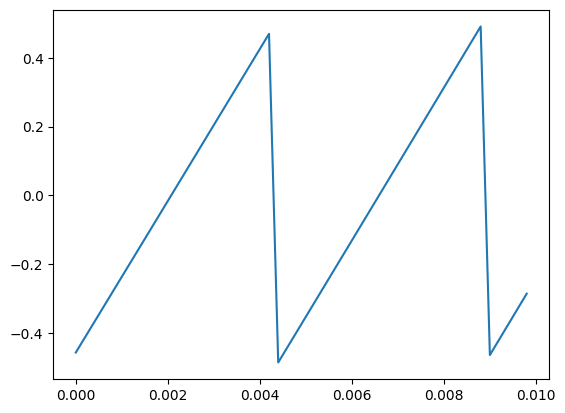

In [7]:
wave1.segment(start=0, duration=0.01).plot()

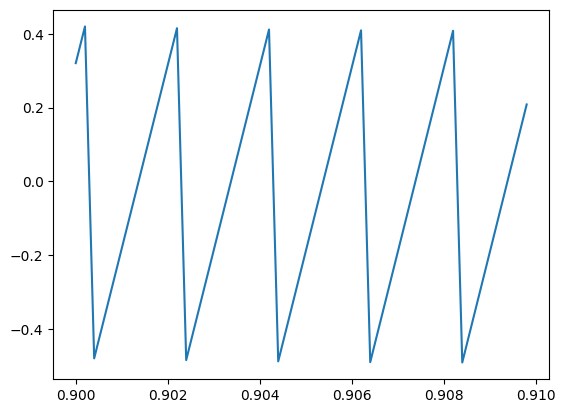

In [8]:
wave1.segment(start=0.9, duration=0.01).plot()

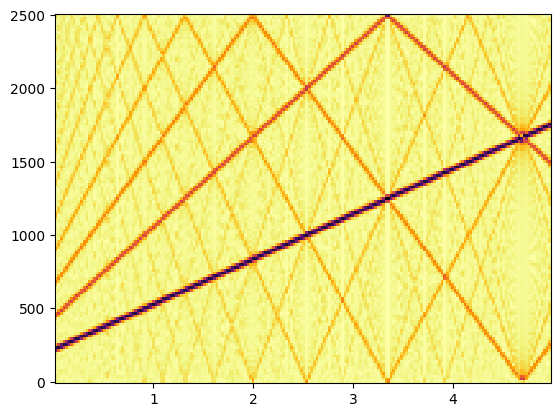

In [9]:
wave1_spectrogram = wave1.make_spectrogram(256)
wave1_spectrogram.plot()

Биения отчетливо видны на картинке в виде менее интенсивных лучей, которые отражаются от частоты равной половине от framerate. Биения уходят при увеличении частоты взятия кадров

## Задание 3. 
Создать пилообразный чирп. Сгенерировать на его основе сигнал.

In [10]:
signal = SawtoothChirp(start=2500, end=3000, amp=1.0)
wave2 = signal.make_wave(duration=1, framerate=20000)
wave2.make_audio()

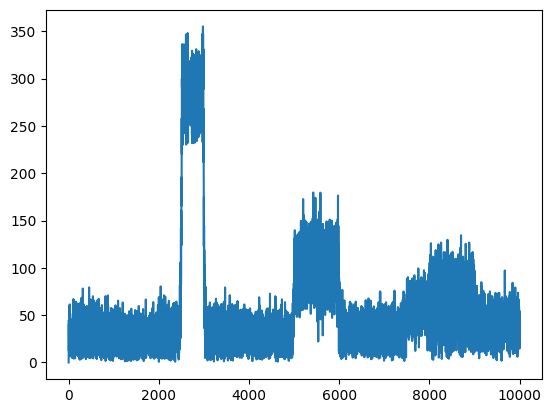

In [11]:
wave2_spectrum = wave2.make_spectrum()
wave2_spectrum.plot()

## Задание 4. 
Распечатать спектрограмму глиссандо.

In [12]:
glissando_wave = td.read_wave("wavs/rhapblue11924_64kb.wav").segment(6, 4)
glissando_wave.make_audio()

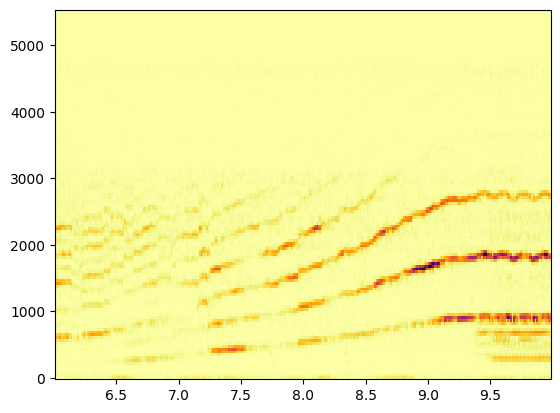

In [13]:
glissando_wave.make_spectrogram(256).plot()

В моменты времени от 8 до 9 секунд частота плавно повышается.

## Задание 5. 
Написать класс TromboneGliss. Создать сигнал и напечатать его спектрограмму. 

In [14]:
class TromboneGliss(td.Chirp):
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts) - 1)
        freqs = 1 / lengths
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [15]:
trombone = TromboneGliss(262, 349).make_wave(duration=1) | TromboneGliss(349, 262).make_wave(duration=1)
trombone.make_audio()

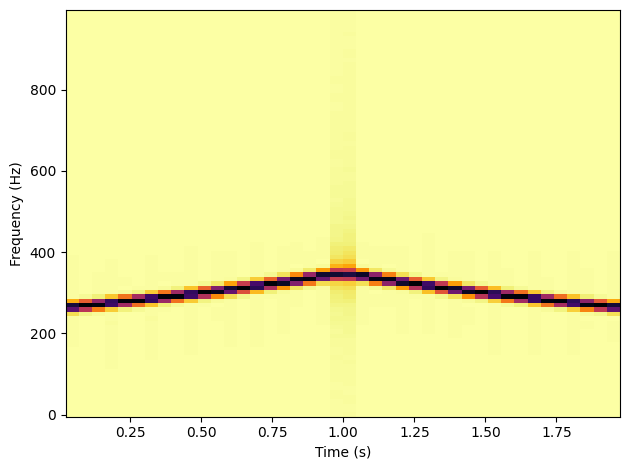

In [16]:
trombone.make_spectrogram(1024).plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Изменение частоты имеет нелинейный характер, но похож на линейный чирп больше, чем на экспоненциальный.

## Задание 6. 
Посмотреть спектрограмму записи гласных звуков.

In [17]:
vowels = td.read_wave(filename='wavs/rusVowels.wav')
vowels.segment(start=0, duration=5).make_audio()

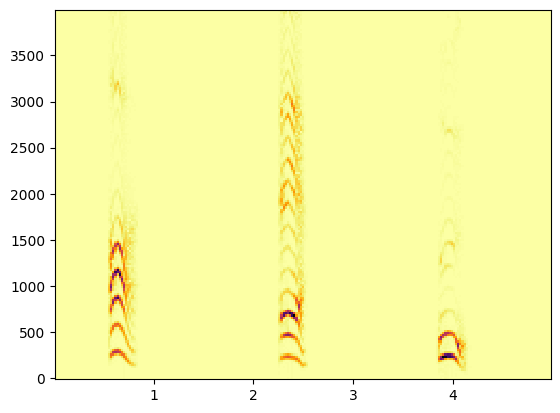

In [18]:
vowels.segment(start=0, duration=5).make_spectrogram(2048).plot(high=4000)

А-Э-Ы

In [19]:
vowels.segment(start=5, duration=5).make_audio()

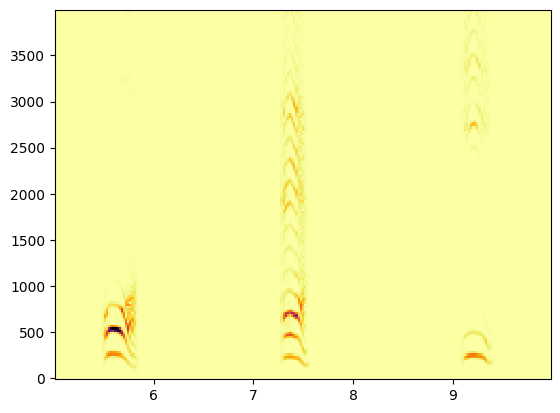

In [50]:
vowels.segment(start=5, duration=5).make_spectrogram(2048).plot(high=4000)

О-Э-И

Видно, насколько сильно разные гласные отличаются друг от друга на спектрограмме. Также стоит заметить, что в обеих частях записи присутствовала буква "Э", что также отчётливо видно на спектрограмме (середина на обеих графах).